## 1.4.10 Histograms in OpenCV

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('kuro2.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [3]:
print(np.transpose(hist))

[[21626.  7514.  5653.  4357.  3302.  2696.  2229.  1979.  1843.  1719.
   1657.  1638.  1556.  1604.  1502.  1563.  1545.  1502.  1521.  1464.
   1492.  1475.  1439.  1401.  1547.  1517.  1409.  1536.  1520.  1510.
   1519.  1560.  1509.  1495.  1492.  1533.  1603.  1384.  1471.  1448.
   1483.  1407.  1433.  1466.  1438.  1427.  1465.  1411.  1358.  1476.
   1428.  1440.  1404.  1348.  1463.  1436.  1385.  1469.  1352.  1304.
   1405.  1413.  1421.  1457.  1444.  1403.  1480.  1419.  1472.  1504.
   1502.  1428.  1466.  1437.  1456.  1450.  1503.  1490.  1483.  1532.
   1473.  1534.  1539.  1544.  1599.  1588.  1564.  1581.  1601.  1506.
   1581.  1487.  1554.  1534.  1584.  1573.  1586.  1620.  1576.  1593.
   1593.  1591.  1618.  1592.  1548.  1596.  1650.  1606.  1614.  1612.
   1567.  1612.  1560.  1638.  1665.  1565.  1624.  1688.  1702.  1670.
   1601.  1674.  1648.  1588.  1631.  1700.  1677.  1607.  1693.  1643.
   1566.  1744.  1729.  1671.  1743.  1722.  1744.  1730.  1662.

In [4]:
hist = np.bincount(img.ravel(),minlength=256)

In [5]:
from matplotlib import pyplot as plt

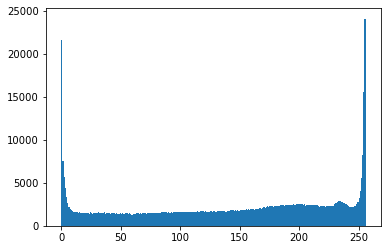

In [6]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [7]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

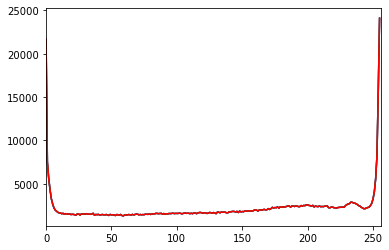

In [10]:
img = cv2.imread('kuro2.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

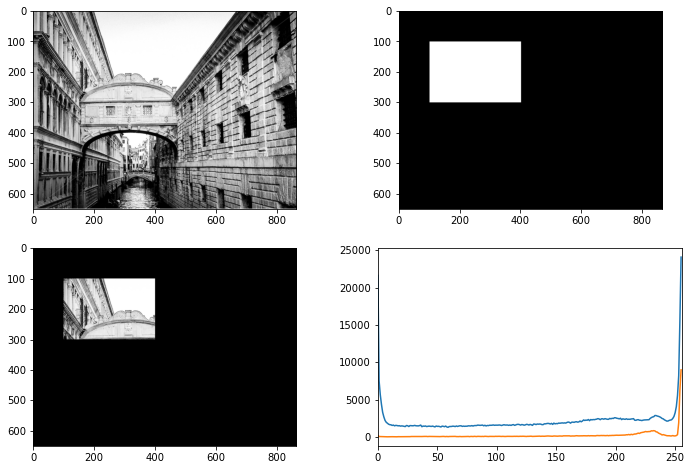

In [11]:
img = cv2.imread('kuro2.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

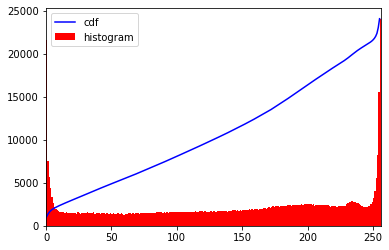

In [12]:
img = cv2.imread('kuro2.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [23]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

<Figure size 1800x1080 with 0 Axes>

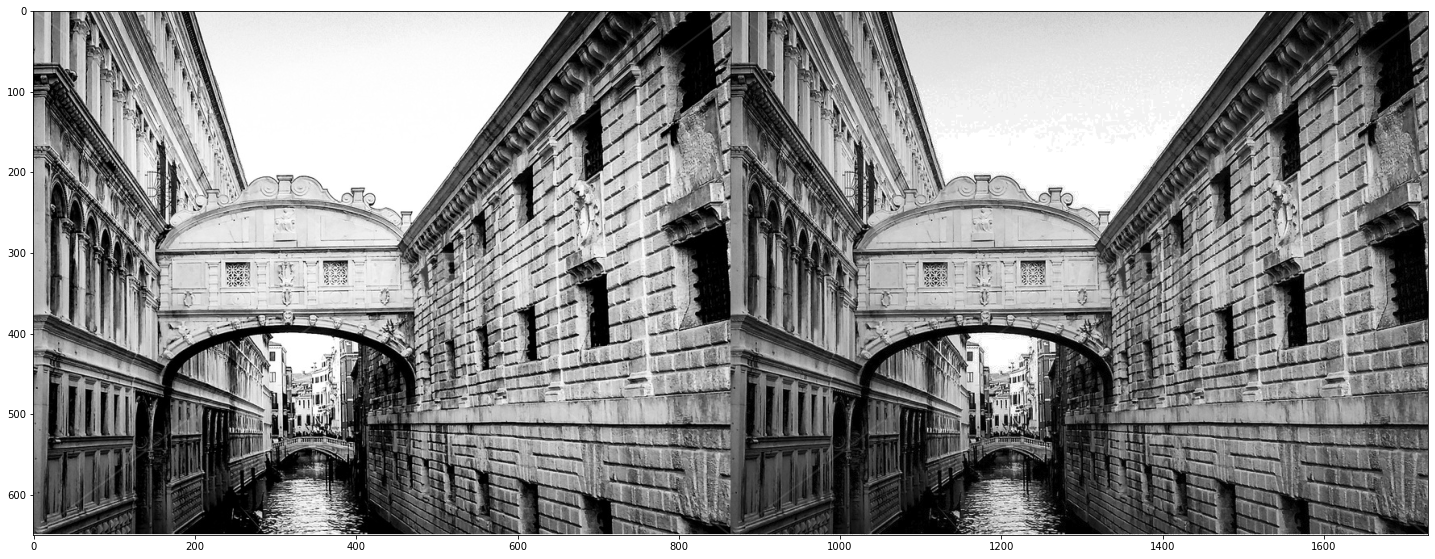

<Figure size 1800x1080 with 0 Axes>

In [25]:
img = cv2.imread('kuro2.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.subplot(111),plt.imshow(res,'gray')
plt.figure(figsize=(25,15))